In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:

file_path = "bank-additional.csv"  
data = pd.read_csv(file_path, delimiter=";")



In [3]:

label_encoders = {}
categorical_columns = data.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le



In [4]:

X = data.drop(columns=["y"])
y = data["y"]



In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [ ]:

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [ ]:

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       734
           1       0.47      0.44      0.46        90

    accuracy                           0.88       824
   macro avg       0.70      0.69      0.70       824
weighted avg       0.88      0.88      0.88       824


Confusion Matrix:
[[689  45]
 [ 50  40]]


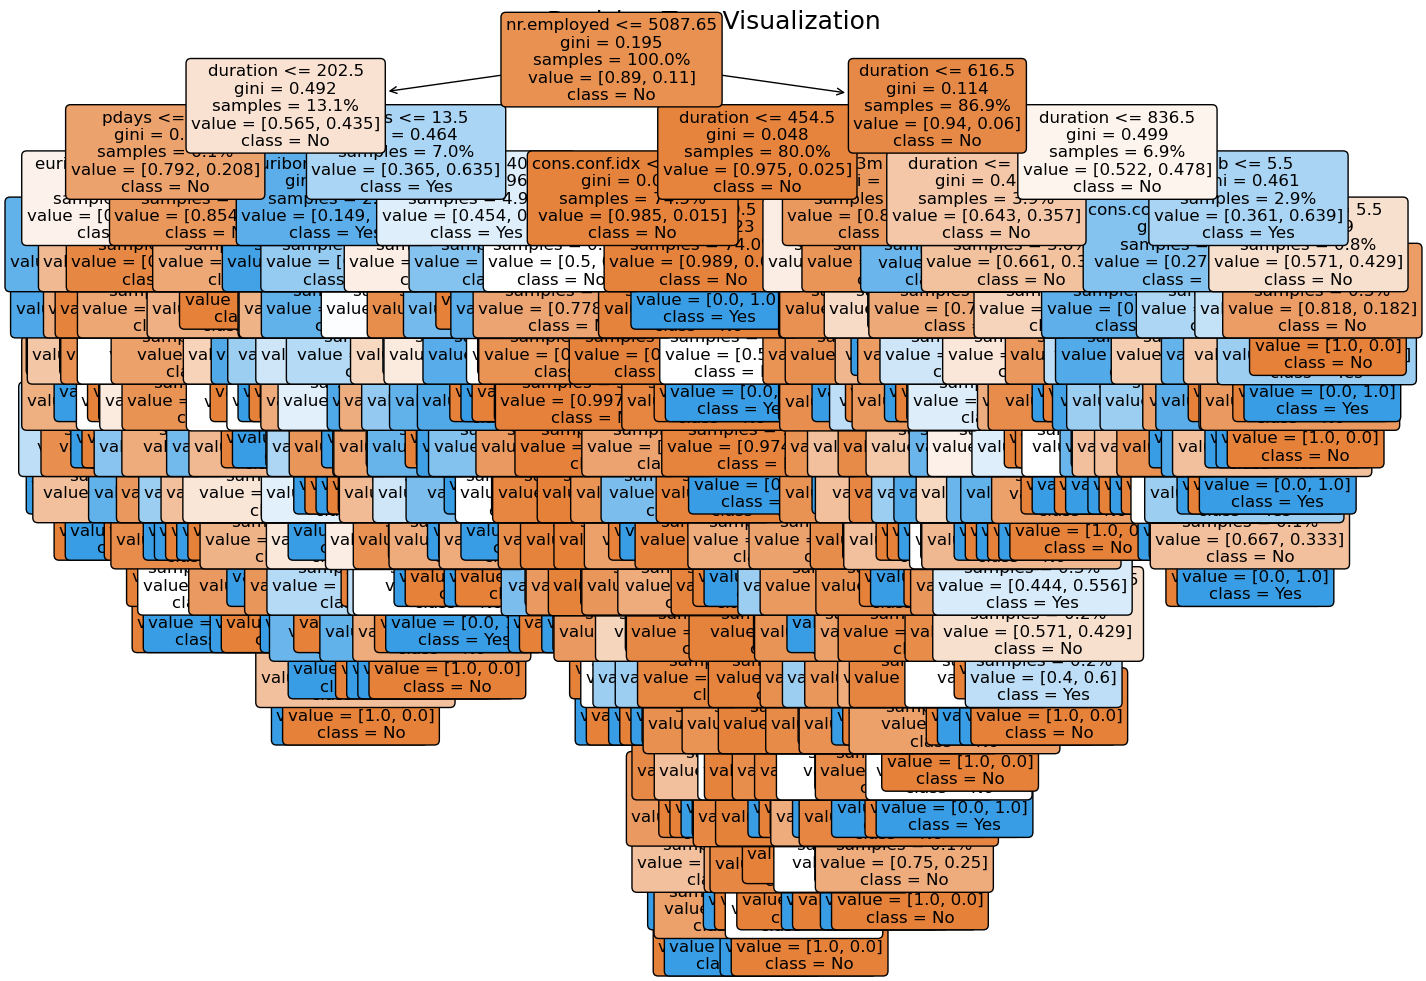

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize=(16, 12))  
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No", "Yes"],  
    filled=True,  
    rounded=True, 
    fontsize=12,  
    proportion=True  
)
plt.title("Decision Tree Visualization", fontsize=18)  
plt.show()
